<a href="https://colab.research.google.com/github/cweikucf/cap4630/blob/master/HW_5/ConnerWeik_CAP4630_Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conner Weik
# CAP 4630, Spring 2020
# Homework 5
If something doesn't work, please try doing run all or let me know. Thanks!

# Imports and stuff

In [1]:
%tensorflow_version 2.x
import numpy as np
import tensorflow.keras as keras
from keras import models, layers
import matplotlib.pyplot as plt

np.random.seed(10)

Using TensorFlow backend.


# 1. General concepts

## Artificial intelligence, machine learning, and deep learning
Artificial intelligence is the concept of and field of computers doing things that are "smart". This is really broad, and it might be used to mean computers doing "intelligent" things that a computer would normally not be expected to do.
\
\
Two subsets of artificial intelligence are "symbolic AI" or "good old fashioned AI" ("GOFAI"), and machine learning.

Symbolic AI involves a computer using input and a set of rules to get an output. The symbolic AI program may be presented with a problem of some sort and uses the rules to come up with a solution. This has been the traditional form of AI. The programmer must specify all rules that the AI follows.

Machine learning, on the other hand, takes inputs and outputs, and tries to come up with rules. This allows it to perform well on unforseen data.

Within machine learning, there are multiple types of machine learning. These include supervised learning unsupervised learning, and reinforcement learning.

In supervised learning, labels are provided for given input. This allows a machine learning model's performance to be evaluated. Much of what we learned in this course is supervised learning.

In unsupervised learning, labels are not provided. Unsupervised learning might try to find patterns in data that might not be noticed by humans.

In reinforcement learning, a model can receive positive or negative "reinforcement". This can encourage it to perform some action more often or less often or predict one or another way based on the reinforcement it receives.

Deep learning is a subset of machine learning that involves using multiple layers to progressively abstract features from input.

# 2. Basic concepts





## Loss

In machine learning, we often want to minimize error. In supervised learning, we can define a loss function that we want to be minimized when our error is low and maximized when our error is high.

## The gradient


For a scalar function $f$, we define the gradient of $f$, $\nabla{f}$, as the vector function where its component in each dimension is the partial derivative of $f$ with respect to that dimension.

$\nabla{f}$ = $\left< f_x, f_y, f_z, ... \right>$

## How gradient ties in with multivariate loss function

We want to minimize loss. The gradient of a multivariate scalar function points in the direction of steepest increase.

We can use the gradient to minimize loss by using the negative of the gradient. The negative of the gradient gives us the direction of steepest decrease.

## Gradient descent and minima

The prediction of our machine learning model can be of the form $\hat{y} = w_1x_1 + w_2x_2 + ...$

where $w_1, w_2, ...$ are the weights.

We can repeatedly update our weights based on the gradient and try to find a minimum for our loss function.

It can be important for our loss function to not have many local minima. Gradient descent can get "stuck" in a local minimum. We want to find the global minimum.

## Types of gradient descent

In this course, we studied stochastic gradient descent, mini-batch gradient descent, and batch gradient descent.

Stochastic gradient descent uses a single example for each epoch.

Mini-batch gradient descent uses some number of examples greater than one and less than the full training dataset for each epoch.

Batch gradient descent uses the whole training dataset for each epoch.

Batch gradient descent can be the most stable and the most expensive. Stochastic gradient descent can be the most unstable and the least expensive.
Mini-batch gradient descent is a middle between the two.

Sometimes mini-batch gradient descent might be preferred over batch gradient descent. If a large data set has data that we're randomly sampling during batch gradient descent, there can be redundancy, and it can be okay to not use as many samples per epoch.

## Linear regression

A common problem in machine learning is linear regression. This involves finding a "line of best fit" for data.

We define our prediction function to be $\hat{y} = w_1x_1 + w_2x_2 + ...$, where $w$ is the weight vector and $x$ is the feature vector.

Gradient descent can be used to solve linear regression. 

I will demonstrate a simple example of using gradient descent to solve linear regression. The weights can be extracted from the model after training is complete. Credit: https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/linear_regression_keras.ipynb



Epoch 1/20
100/100 [==============================] - 2s 16ms/step - loss: 250.8045 - mse: 250.8045
Epoch 2/20
100/100 [==============================] - 0s 86us/step - loss: 0.9333 - mse: 0.9333
Epoch 3/20
100/100 [==============================] - 0s 87us/step - loss: 0.8801 - mse: 0.8801
Epoch 4/20
100/100 [==============================] - 0s 93us/step - loss: 0.9133 - mse: 0.9133
Epoch 5/20
100/100 [==============================] - 0s 129us/step - loss: 0.9675 - mse: 0.9675
Epoch 6/20
100/100 [==============================] - 0s 135us/step - loss: 0.9076 - mse: 0.9076
Epoch 7/20
100/100 [==============================] - 0s 107us/step - loss: 0.8872 - mse: 0.8872
Epoch 8/20
100/100 [==============================] - 0s 85us/step - loss: 0.9198 - mse: 0.9198
Epoch 9/20
100/100 [==============================] - 0s 93us/step - loss: 0.9053 - mse: 0.9053
Epoch 10/20
100/100 [==============================] - 0s 95us/step - loss: 0.9184 - mse: 0.9184
Epoch 11/20
100/100 [===========

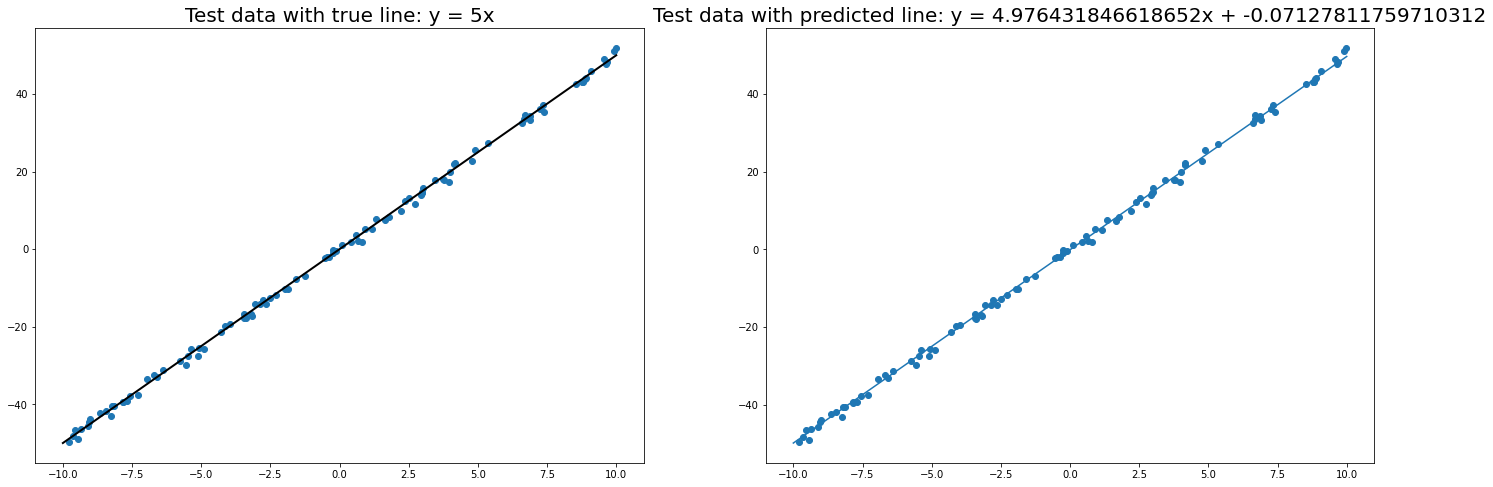

In [2]:
# Generate the random data that will be used. This will correspond to the line y=5x with some noise.
num_samples = 100

train_x = np.random.default_rng().uniform(-10, 10, num_samples)
train_y = 5 * train_x + np.random.default_rng().normal(0, 1, num_samples)

test_x = np.random.default_rng().uniform(-10, 10, num_samples)
test_y = 5 * test_x + np.random.default_rng().normal(0, 1, num_samples)

# Build the model.
model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,)))

# Compile the model.
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Train the model.
model.fit(train_x, train_y, epochs=20)

# Show data and compare the true line with the predicted line.
fig = plt.figure(figsize=(24, 8))
plt.subplot(121)
plt.title('Test data with true line: y = 5x', fontdict={'fontsize':20})
plt.scatter(train_x, train_y)
plt.plot([-10, 10], [-50, 50], 'k-', lw=2)

plt.subplot(122)
predicted_weight = model.get_weights()[0][0][0]
predicted_bias = model.get_weights()[1][0]
plt.title('Test data with predicted line: y = {}x + {}'.format(predicted_weight, predicted_bias), fontdict={'fontsize':20})
plt.scatter(train_x, train_y)
plt.plot([-10, 10], [-10 * predicted_weight + predicted_bias, 10 * predicted_weight + predicted_bias])




## Logistic regression

The sigmoid function $\sigma: \mathbb{R}\mapsto\mathbb(0, 1)$ is defined as follows:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

It is equal to $\frac{1}{2}$ when z = 0. It is close to 0 when z is very negative and close to 1 when z is very positive.



Logistic regression is another machine learning problem. It is somewhat similar to linear regression. It can be used in binary classifcation by mapping the result of the sigmoid function to one of the two classes 0 and 1.

The weights can also be extracted from a model in logistic regression. Results can be of the form $\hat{y} = predict(\sigma(w \cdot x)$ where predict(z) equals 0 if z < 0.5 and 1 otherwise.

I will demonstrate logistic regression.
For this problem, there will be 2 classes of points in 3-dimensional space. One class will correspond with the plane $x_3=x_1+x_2$ and one will correspond with the plane $x_3=x_1+x_2+2$.

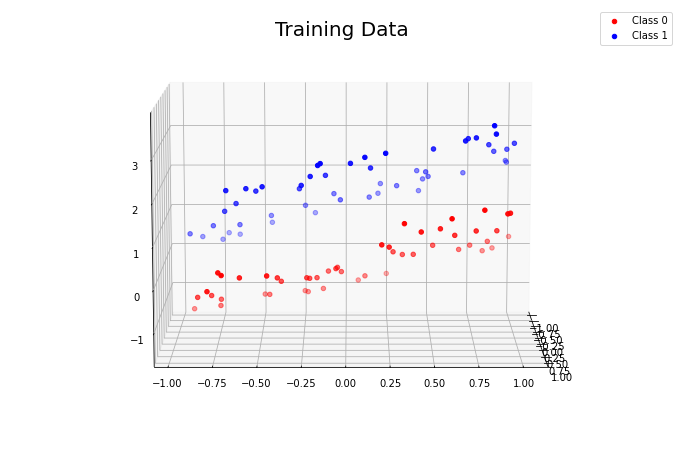

In [3]:
train_m = 100
test_m = 20

# Generate training and test data.
train_x1 = np.random.default_rng().uniform(-1, 1, train_m)
train_x2 = np.random.default_rng().uniform(-1, 1, train_m)
train_x3 = np.zeros(train_m)
train_labels = np.zeros(train_m)
for i in range(train_m):
  if np.random.randint(0, 2) == 0:
    train_x3[i] = train_x1[i] + train_x2[i] + np.random.default_rng().normal(0, 0.1, 1)
    train_labels[i] = 0
  else:
    train_x3[i] = train_x1[i] + train_x2[i] + np.random.default_rng().normal(0, 0.1, 1) + 2
    train_labels[i] = 1

test_x1 = np.random.default_rng().uniform(-1, 1, test_m)
test_x2 = np.random.default_rng().uniform(-1, 1, test_m)
test_x3 = np.zeros(test_m)
test_labels = np.zeros(test_m)
for i in range(test_m):
  if np.random.randint(0, 2) == 0:
    test_x3[i] = test_x1[i] + test_x2[i] + np.random.default_rng().normal(0, 0.1, 1)
    test_labels[i] = 0
  else:
    test_x3[i] = test_x1[i] + test_x2[i] + np.random.default_rng().normal(0, 0.1, 1) + 2
    test_labels[i] = 1

# Plot the training data.
fig = plt.figure(figsize=(12, 8))

ax = plt.axes(projection='3d')
ax.scatter3D(train_x1[train_labels == 0], train_x2[train_labels == 0], train_x3[train_labels == 0], c="red", label="Class 0")
ax.scatter3D(train_x1[train_labels == 1], train_x2[train_labels == 1], train_x3[train_labels == 1], c="blue", label="Class 1")

ax.view_init(10, 0)
plt.title('Training Data', fontdict={'fontsize':20})
plt.legend()
pass

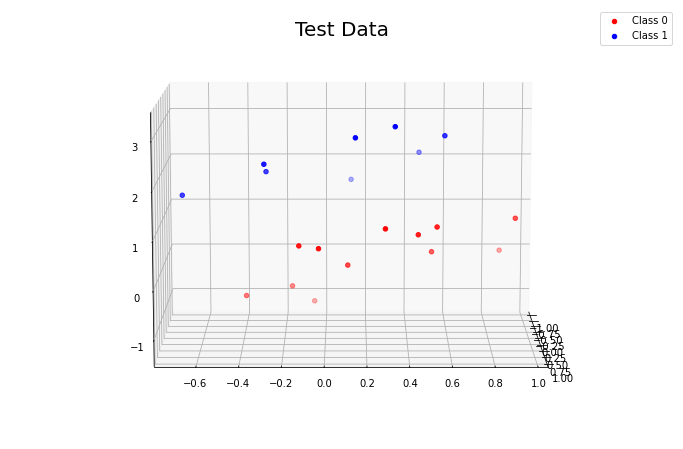

In [4]:
# Plot the test data.
fig = plt.figure(figsize=(12, 8))

ax = plt.axes(projection='3d')
ax.scatter3D(test_x1[test_labels == 0], test_x2[test_labels == 0], test_x3[test_labels == 0], c="red", label="Class 0")
ax.scatter3D(test_x1[test_labels == 1], test_x2[test_labels == 1], test_x3[test_labels == 1], c="blue", label="Class 1")

ax.view_init(10, 0)
plt.title('Test Data', fontdict={'fontsize':20})
plt.legend()
pass

Perform logistic regression

In [5]:
# Build and compile the model
model = models.Sequential()
opt = keras.optimizers.RMSprop(lr=0.01)
model.add(layers.Dense(1, activation='sigmoid', name='DenseOutput', input_dim=3))
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(np.array([train_x1, train_x2, train_x3]).T, train_labels, validation_data=(np.array([test_x1, test_x2, test_x3]).T, test_labels), epochs=100)

Train on 100 samples, validate on 20 samples
Epoch 1/100
100/100 [==============================] - 0s 980us/step - loss: 1.2998 - accuracy: 0.2400 - val_loss: 1.2924 - val_accuracy: 0.3500
Epoch 2/100
100/100 [==============================] - 0s 136us/step - loss: 1.2284 - accuracy: 0.2300 - val_loss: 1.2391 - val_accuracy: 0.2500
Epoch 3/100
100/100 [==============================] - 0s 120us/step - loss: 1.1749 - accuracy: 0.2000 - val_loss: 1.1894 - val_accuracy: 0.2500
Epoch 4/100
100/100 [==============================] - 0s 121us/step - loss: 1.1292 - accuracy: 0.2000 - val_loss: 1.1546 - val_accuracy: 0.2500
Epoch 5/100
100/100 [==============================] - 0s 116us/step - loss: 1.0920 - accuracy: 0.1700 - val_loss: 1.1315 - val_accuracy: 0.2500
Epoch 6/100
100/100 [==============================] - 0s 123us/step - loss: 1.0669 - accuracy: 0.1700 - val_loss: 1.1056 - val_accuracy: 0.2500
Epoch 7/100
100/100 [==============================] - 0s 116us/step - loss: 1.0380 -

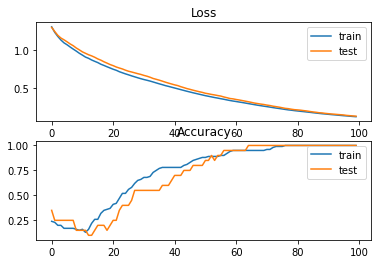

In [6]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

plt.show()

### Obtaining the separating plane

We can obtain the separating plane similarly as we obtained the separating line in Homework 3, Problem 2.

We will solve $w_1x_1 + w_2x_2 + w_3x_3 + b = 0$ in terms of $x_3$.

$w_1x_1 + w_2x_2 + w_3x_3 + b = 0$

$w_3x_3 = -w_1x_1 - w_2x_290 - b$

$x_2 = -\frac{w_1}{w_3}x_1 - \frac{w_2}{w_3}x_2 - \frac{b}{w_3}$

We get $x_2 = -\frac{w_1}{w_3}x_1 - \frac{w_2}{w_3}x_2 - \frac{b}{w_3}$.

The true planes used to generate the data are $x_3 = x_1 + x_2$ and $x_3 = x_1 + x_2 + 2$.

In [7]:
dense_layer = model.get_layer(name='DenseOutput')
weights = dense_layer.get_weights()[0][:,0]
bias = dense_layer.get_weights()[1][0]
coefficient1 = - (weights[0] / weights[2])
coefficient2 = - (weights[1] / weights[2])
coefficient3 = - (bias / weights[2])
print("The plane that the model predicts is x_3 = {0}x_1 + {1}x_2 + {2}".format(coefficient1, coefficient2, coefficient3))

The plane that the model predicts is x_3 = 0.7889741063117981x_1 + 0.7109518647193909x_2 + 0.8367621898651123


### Results


Here, the red plane represents the plane for class 0, the red dots represent the data for class 0, the blue plane represents the plane for class 1, the blue dots represent the data for class 1, and the purple plane represents the model's separating plane.

<Figure size 864x576 with 0 Axes>

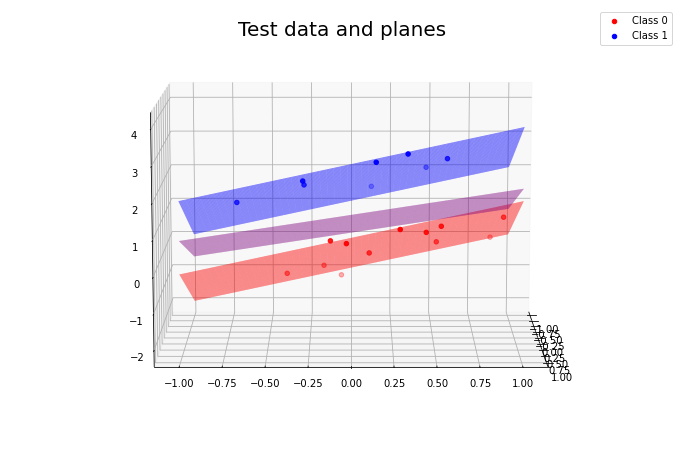

In [8]:
# Training set
fig = plt.figure(figsize=(12, 8))

x_1_plane = np.linspace(-1, 1, 50)
x_2_plane = np.linspace(-1, 1, 50)
x_3_plane = x_1_plane + x_2_plane

X_1, X_2 = np.meshgrid(x_1_plane, x_2_plane)
X_3 = X_1 + X_2

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X_1, X_2, X_3, rstride=1, cstride=1,
                color='red', alpha=0.5)

x_1_plane = np.linspace(-1, 1, 50)
x_2_plane = np.linspace(-1, 1, 50)
x_3_plane = x_1_plane + x_2_plane + 2
X_1, X_2 = np.meshgrid(x_1_plane, x_2_plane)
X_3 = X_1 + X_2 + 2
ax.plot_surface(X_1, X_2, X_3, rstride=1, cstride=1,
                color='blue', alpha=0.5)

x_1_plane = np.linspace(-1, 1, 50)
x_2_plane = np.linspace(-1, 1, 50)
x_3_plane = x_1_plane + x_2_plane + 2
X_1, X_2 = np.meshgrid(x_1_plane, x_2_plane)
X_3 = coefficient1 * X_1 + coefficient2 * X_2 + coefficient3
ax.plot_surface(X_1, X_2, X_3, rstride=1, cstride=1,
                color='purple', alpha=0.5)

ax.scatter3D(test_x1[test_labels == 0], test_x2[test_labels == 0], test_x3[test_labels == 0], c="red", label="Class 0")
ax.scatter3D(test_x1[test_labels == 1], test_x2[test_labels == 1], test_x3[test_labels == 1], c="blue", label="Class 1")

ax.view_init(10, 0)
plt.title('Test data and planes', fontdict={'fontsize':20})
plt.legend()
pass

# 3. Building a model

## Types of models

When building models with Keras, we have mainly covered non-convolutional models that consist entirely of non-convolutional layers, and convolutional models that consist of a conv base and a classifier.

## Structure of a convnet
A convnet consists of a convolutional base and a classifier.

The convolutional base is often pretrained. Its layers may be very general and not specific to a certain application that it's being used in.

The convolutional classifier is what is added on top of the base. These can be your normal Keras layers.

Each conv layer in the conv bases uses a convolutional filter to apply the convolution operation to its input. The filter is a matrix that passes over different possible spots in the input.

The maxpooling function is used to reduce the number of dimensions of the feature map while preserving information.

Convolution can be used to extract more and more abstract features from input.

# 4. Compiling a model

Keras offers multiple different optimizers, which affect how the model is affected by updates. Some may be preferred in some circumstances over others.
When compiling a model, metrics can be specified, which don't affect how the model learns during training but are used to evaluate the model.


## Learning rate

Learning rate can be specified when compiling a model. It determines how fast a model learns - how much it is affected by updates.

In gradient descent, the model updates the weight vector at each step by subtracting $\alpha\nabla L$. $\alpha$ is the learning rate.

# 5. Training a model

## Training data, test data, and validation data

Data can be divided into three sets: training, test, and validation.

Training data is the data that a machine learning model trains on. It goes through epochs and weights get updated.

Test data can be used to measure the performance of a model. For example, the accuracy of a model on the test set can be measured by observing how many test samples it gets correct out of the total number of test samples.

Based on a model's performance on test data, hyperparameters such as learning rate might be tweaked.

The validation can be another set somewhat like the test set but more final. It can be used to evaluate a model after all training is complete before it is used in production or elsewhere.


## Overfitting and underfitting

![](https://upload.wikimedia.org/wikipedia/commons/1/19/Overfitting.svg)

Image source: https://upload.wikimedia.org/wikipedia/commons/1/19/Overfitting.svg

Overfitting is when a model fits too much around training data. This can cause it to perform worse in general. It can be better if the model does slightly worse on training data to do better in general.

In the above picture, the green line represents overfitting. It captures all of the training data, but it's a really complicated pattern compared to the black line, which is the properly fit line. The green line will probably perform poorly on unseen data.

If a model has a much higher training accuracy than validation accuracy, there might be overfitting.


![](https://drive.google.com/uc?id=1g0umFb0w3zyoIT7yENGDXELJzPfpZA3q)

Source: https://colab.research.google.com/drive/1F-RWvoxH8MmT7c1UmNy41iuOp-ejiLoF

Underfitting is the opposite of overfitting. It's when the model doesn't do well enough on training data compared to validation data.

## Hyperparameters

Hyperparameters are parameters that are set before training begins and are not updated during training. These include learning rate and number of epochs.

An epoch is an update iteration. The number of samples trained on per epoch can vary.

Learning rate, as explained above, affects how fast a model's weights are updated. It can be important to choose a good learning rate for a problem. If learning rate is too high, the negative of the gradient might get taken way too far and the local minimum might be "escaped". If learning rate is too low, the model just might take too long to learn well enough and be intractable.

# 6. Finetuning a pretrained model

The pretrained models that we worked with in this class were pretrained conv bases.

These conv bases consist of their own layers.

Before fine-tuning, we keep those layers frozen and add a classifier. We train the model with the frozen layers and unfrozen classifier.

We then unfreeze some of the top layers of the conv base, and retrain the model, this time with those unfrozen layers and the classifier still unfrozen.

A lot of fine-tuning can be trial and error.

One could try to start with unfreezing about 20% of the pretrained model's layers.

The structure of the classifier can also be important. Try to choose a number of parameters that well reflects the complexity of the problem. A small and simple dataset with clear differences between labels might take few parameters, while a huge and nuanced dataset may take many parameters.

Adjust based on the results.

## Example

I am going to fine-tune a pretrained convnet on the cats and dogs dataset. I will unfreeze the top 30 layers.

### Setup

In [9]:
import os
import zipfile
from keras.applications import DenseNet121
from keras import layers
from keras import models
from keras import optimizers
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

--2020-04-25 02:24:43--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.11.176, 2607:f8b0:4007:80e::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.11.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   282MB/s    in 0.2s    

2020-04-25 02:24:43 (282 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [10]:
# Load the conv base and freeze it
conv_base = DenseNet121(
    weights='imagenet', 
    include_top=False, 
    input_shape=((150, 150, 3))
)
conv_base.trainable = False

# Concatenate the convolutional base and densely connected layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

29089792/29084464 [==============================] - 1s 0us/step


### Train the model end to end with frozen convolutional base

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 35s 354ms/step - loss: 0.4230 - acc: 0.7915 - val_loss: 0.1561 - val_acc: 0.9590
Epoch 2/10
100/100 [==============================] - 22s 223ms/step - loss: 0.2666 - acc: 0.8875 - val_loss: 0.2062 - val_acc: 0.9450
Epoch 3/10
100/100 [==============================] - 22s 221ms/step - loss: 0.2283 - acc: 0.8965 - val_loss: 0.0245 - val_acc: 0.9620
Epoch 4/10
100/100 [==============================] - 22s 220ms/step - loss: 0.2161 - acc: 0.9160 - val_loss: 7.9320e-04 - val_acc: 0.9410
Epoch 5/10
100/100 [==============================] - 22s 222ms/step - loss: 0.2319 - acc: 0.8980 - val_loss: 0.2274 - val_acc: 0.9520
Epoch 6/10
100/100 [==============================] - 22s 224ms/step - loss: 0.2016 - acc: 0.9150 - val_loss: 0.0703 - val_acc: 0.9280
Epoch 7/10
100/100 [==============================] - 22s 221ms/step - loss: 0.1853 - acc: 0.9265 - va

### Display curves of loss and accuracy during training

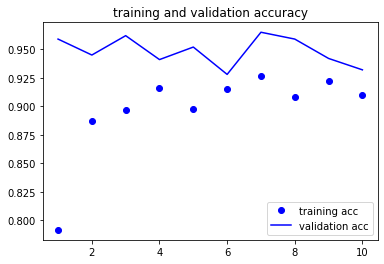

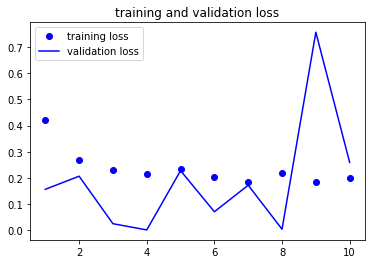

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

### Fine-tuning

Show the model's layers

In [13]:
for layer in conv_base.layers:
  print(layer.name)

input_1
zero_padding2d_1
conv1/conv
conv1/bn
conv1/relu
zero_padding2d_2
pool1
conv2_block1_0_bn
conv2_block1_0_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_concat
conv2_block2_0_bn
conv2_block2_0_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_concat
conv2_block3_0_bn
conv2_block3_0_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_concat
conv2_block4_0_bn
conv2_block4_0_relu
conv2_block4_1_conv
conv2_block4_1_bn
conv2_block4_1_relu
conv2_block4_2_conv
conv2_block4_concat
conv2_block5_0_bn
conv2_block5_0_relu
conv2_block5_1_conv
conv2_block5_1_bn
conv2_block5_1_relu
conv2_block5_2_conv
conv2_block5_concat
conv2_block6_0_bn
conv2_block6_0_relu
conv2_block6_1_conv
conv2_block6_1_bn
conv2_block6_1_relu
conv2_block6_2_conv
conv2_block6_concat
pool2_bn
pool2_relu
pool2_conv
pool2_pool
conv3_block1_0_bn
conv3_block1_0_relu
conv3_block1_1_conv
conv3

I will be unfreezing the top 30 layers of the conv base, that is, the layer named conv5_block13_0_bn and all layers above it.

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'conv5_block13_0_bn':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [15]:
# compile model

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 35s 347ms/step - loss: 0.1741 - acc: 0.9290 - val_loss: 0.0024 - val_acc: 0.9610
Epoch 2/10
100/100 [==============================] - 23s 234ms/step - loss: 0.1724 - acc: 0.9320 - val_loss: 0.1024 - val_acc: 0.9500
Epoch 3/10
100/100 [==============================] - 24s 235ms/step - loss: 0.1940 - acc: 0.9135 - val_loss: 0.2835 - val_acc: 0.9590
Epoch 4/10
100/100 [==============================] - 23s 233ms/step - loss: 0.1747 - acc: 0.9285 - val_loss: 0.1558 - val_acc: 0.9620
Epoch 5/10
100/100 [==============================] - 23s 235ms/step - loss: 0.1742 - acc: 0.9305 - val_loss: 0.0493 - val_acc: 0.9620
Epoch 6/10
100/100 [==============================] - 23s 233ms/step - loss: 0.1545 - acc: 0.9400 - val_loss: 0.0671 - val_acc: 0.9610
Epoch 7/10
100/100 [==============================] - 23s 234ms/step - loss: 0.1650 - acc: 0.9340 - val_loss: 0.0963 - val_acc: 0.9610
Epoch 8/10
100/100 [==============================] - 2

### Display learning curves during fine-tuning

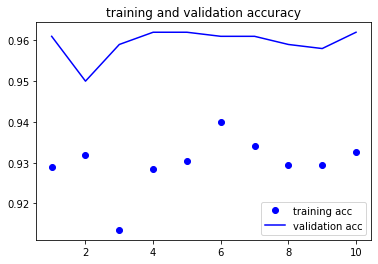

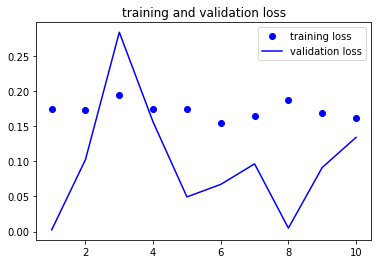

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

### Print out validation loss and accuracy

In [0]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)

In [18]:
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.1605813205242157
Validation accuracy: 0.9620000123977661


# 7. Other

Other things that I learned in this course

## Numpy

Numpy was really useful. It has lots of functions that can be used to vectorize code. Also, operations can be vectorized and arrays can kind of be treated like single values.

In [19]:
array1 = np.random.normal(100, 10, 10)
array2 = np.random.uniform(50, 10, 10)
print(array1 + array2)

[130.00163545 124.1193325  119.73565575 106.61700843 153.62601191
 142.64875407 125.45295791 165.06353492  98.81273069 120.40136668]


In [20]:
from time import time

x = np.zeros((1000000,))

start = time()
for i in range(1000000):
  x[i] = 1
print(time() - start)

x = np.zeros((1000000,))
start = time()
x.fill(1)
print(time() - start)



0.13022470474243164
0.0005779266357421875


## Matplotlib

Matplotlib, specifically pyplot, was really helpful with a lot of the assignments. I learned about plotting both in 2d and 3d.

## LaTeX

I also learned about and used LaTeX in assignments.

# Sources / Links

https://github.com/schneider128k/machine_learning_course/blob/master/slides/1_a_slides.pdf

https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d?gi=7cd0d12b1ace

https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/

https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/linear_regression_keras.ipynb

https://github.com/schneider128k/machine_learning_course/blob/master/slides/2_f_slides.pdf

https://stackoverflow.com/questions/12864294/adding-an-arbitrary-line-to-a-matplotlib-plot-in-ipython-notebook

https://en.wikipedia.org/wiki/Deep_learning

https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf

https://pythonspot.com/3d-scatterplot/

https://github.com/schneider128k/machine_learning_course/blob/master/slides/CNN_slides.pdf

https://github.com/schneider128k/machine_learning_course/blob/master/keras_basics.md

https://github.com/schneider128k/machine_learning_course/blob/master/slides/2_e_slides.pdf

https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

https://colab.research.google.com/drive/1F-RWvoxH8MmT7c1UmNy41iuOp-ejiLoF

https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)

https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/cifar10_dataset.ipynb

https://stackoverflow.com/questions/2662140/how-to-measure-running-time-of-algorithms-in-python

https://colab.research.google.com/drive/1F-RWvoxH8MmT7c1UmNy41iuOp-ejiLoF

The overfitting picture:
https://upload.wikimedia.org/wikipedia/commons/1/19/Overfitting.svg

By Chabacano - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=3610704